# **Name: Shristina Prajapati**
# **UID: 2330706**

# **6CS012-Artificial Intelligence and Machine Learning**

# Text Classification

In [1]:
# first, install all dependencies with compatible versions
!pip install numpy==1.23.5 gensim==4.3.2 tensorflow==2.12.0 scipy==1.10.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 88.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 69.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 2.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 54.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 67.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 103.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import pandas as pd
import numpy as np
import shutil
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [39]:
original_path = '/kaggle/input/truevsfakenews/truevsfakenews (1).csv'
destination_path = '/kaggle/working/truevsfakenews/truevsfakenews (1).csv'

# Ensure the destination directory exists
os.makedirs(os.path.dirname(destination_path), exist_ok=True)

# Remove the file if it already exists
if os.path.exists(destination_path):
    os.remove(destination_path)

# Copy the file
shutil.copy(original_path, destination_path)

# Load into DataFrame
df = pd.read_csv(destination_path)

In [40]:
df.head(10)

,text,label
0,WASHINGTON (Reuters) - The Republican and Demo...,true
1,Women should get as far away from Oklahoma as ...,fake
2,Another huge crowd of Americans tuned in last ...,fake
3,Donald Trump is desperate to stop the investig...,fake
4,"(Reuters) - Planned Parenthood, the U.S. medic...",true
5,WASHINGTON (Reuters) - Democratic state offici...,true
6,WASHINGTON (Reuters) - President Donald Trump ...,true
7,Star Wars icon Mark Hamill previously mocked D...,fake
8,WASHINGTON (Reuters) - The U.S. House of Repre...,true
9,The GOP has obstructed President Obama at ever...,fake


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20000 non-null  object
 1   label   20000 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


In [42]:
print(df.isnull().sum())

text     0
label    0
dtype: int64


In [43]:
df_text=df[['text']]

In [44]:
df_text.iloc[0]['text']

'WASHINGTON (Reuters) - The Republican and Democratic leaders of the U.S. Senate Foreign Relations Committee blasted the U.S. State Department on Tuesday for cuts in staff and what they described as a failure to have a plan for a proposed reorganization. “I don’t think they are anywhere close to having a plan to present relative to the reforms that they want,” said Senator Bob Corker, the Republican chairman of the committee. Rex Tillerson, Republican President Donald Trump’s Secretary of State, has embraced the White House’s proposal - rejected by key members of Congress - to cut the State Department budget by about 30 percent. He has imposed a hiring freeze while analyzing the agency’s operations and deciding how to reorganize them. Tillerson, a former chief executive at Exxon Mobil Corp who took office on Feb. 1, has offered few specifics to ease concerns, including in Congress, that the plan risks weakening U.S. standing in the world. Senator Ben Cardin, the top Democrat on the For

In [45]:
# generate 10 random indices between 0 and 20000
random_indices = np.random.randint(0, 20001, size=10)

# fetch the texts corresponding to those indices
random_texts = [df_text.iloc[i]['text'] for i in random_indices]

# print the random texts
for idx, text in zip(random_indices, random_texts):
    print(f"Text for index {idx}:")
    print(text)
    print()

Text for index 5147:
You might ve noticed that Donald Trump didn t really care for President Obama s final State of the Union address. During the address, the billionaire Twitter troll noted the following:The #SOTU speech is really boring, slow, lethargic   very hard to watch!  Donald J. Trump (@realDonaldTrump) January 13, 2016See, first of all, State of the Union addresses aren t supposed to be like President Camacho s speech in Idiocracy. In fact, they re not supposed to be like literally any of Trump s nonsensical, lie-filled, stream-of-consciousness pander shows.Also, Trump s talking about Obama here   arguably the greatest political orator in modern history.But here s another explanation for Trump s ridiculous tweet. Hours earlier, Trump held another one of his spoken-word performance art pieces in which he satirizes a hackish, frivolously conducted presidential campaign   wait, correction. He s not satirizing anyone. On purpose. During the address, Trump got a taste of his own m

# Clean the text

In [46]:
!pip install contractions

In [47]:
import re
import string
import nltk
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk import pos_tag

# download necessary resources
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [48]:
# lowercase
def lower_order(text):
  return text.lower()

In [49]:
# remove URLs
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+|bit\.ly/\S+')
    return url_pattern.sub(r'', text)

In [50]:
def remove_unwanted_characters(document):
    # remove mentions and hashtags
    document = re.sub(r'@\w+|#\w+', '', document)
    # remove punctuation
    document = document.translate(str.maketrans('', '', string.punctuation))
    # remove extra whitespace
    document = re.sub(r'\s+', ' ', document)
    return document.strip()

In [51]:
# expand contractions
def expand_contractions(text):
    return contractions.fix(text)

In [52]:
# stopwords setup
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [token for token in tokens if token not in stop_words]

In [53]:
# lemmatization
# function to map NLTK POS tags to WordNet POS tags
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):  # adjective
        return wn.ADJ
    elif treebank_tag.startswith('V'):  # verb
        return wn.VERB
    elif treebank_tag.startswith('N'):  # noun
        return wn.NOUN
    elif treebank_tag.startswith('R'):  # adverb
        return wn.ADV
    else:  # default to Noun if tag is not recognized
        return wn.NOUN

# lemmatization function
def lemmatization(tokens):
    # POS tagging the tokens
    pos_tags = pos_tag(tokens)

    lemmatizer = WordNetLemmatizer()
    # lemmatize each token with its corresponding POS tag
    lemmatized_tokens = [
        lemmatizer.lemmatize(token, pos=get_wordnet_pos(tag)) for token, tag in pos_tags
    ]

    return lemmatized_tokens

In [ ]:
# text cleaning pipeline
def text_cleaning_pipeline(text):
    # lowercase
    data = lower_order(text)
    # expand contractions
    data = expand_contractions(data)
    # remove URLs
    data = remove_urls(data)
    # remove unwanted characters
    data = remove_unwanted_characters(data)
    # tokenize
    tokens = word_tokenize(data)
    # remove stopwords
    tokens = remove_stopwords(tokens)
    # lemmatization
    tokens = lemmatization(tokens)
    # return cleaned text
    return " ".join(tokens)

# test
sample_text = "News: The government says it'll review the policy next week. Stay tuned for more updates!"
cleaned_text = text_cleaning_pipeline(sample_text)
print("Original Text:")
print(sample_text)
print("\nCleaned Text:")
print(cleaned_text)

Original Text:
News: The government says it'll review the policy next week. Stay tuned for more updates!

Cleaned Text:
news government say review policy next week stay tune update


In [55]:
# apply cleaning to all texts
df['cleaned_text'] = df['text'].apply(text_cleaning_pipeline)

# check the cleaned data
print(df[['text', 'cleaned_text']].head())

                                                text  \
0  WASHINGTON (Reuters) - The Republican and Demo...   
1  Women should get as far away from Oklahoma as ...   
2  Another huge crowd of Americans tuned in last ...   
3  Donald Trump is desperate to stop the investig...   
4  (Reuters) - Planned Parenthood, the U.S. medic...   

                                        cleaned_text  
0  washington reuters republican democratic leade...  
1  woman get far away oklahoma soon possible chri...  
2  another huge crowd american tune last week rep...  
3  donald trump desperate stop investigation dirt...  
4  reuters plan parenthood yous medical service p...  


# **Data Visualization**

# Bar Plot for Class Distribution

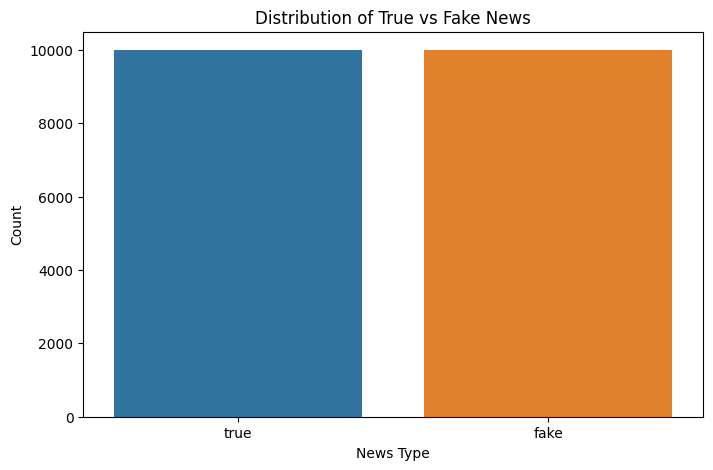

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# count plot of labels
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=df)
plt.title('Distribution of True vs Fake News')
plt.xlabel('News Type')
plt.ylabel('Count')
plt.show()

# Word Cloud Comparison

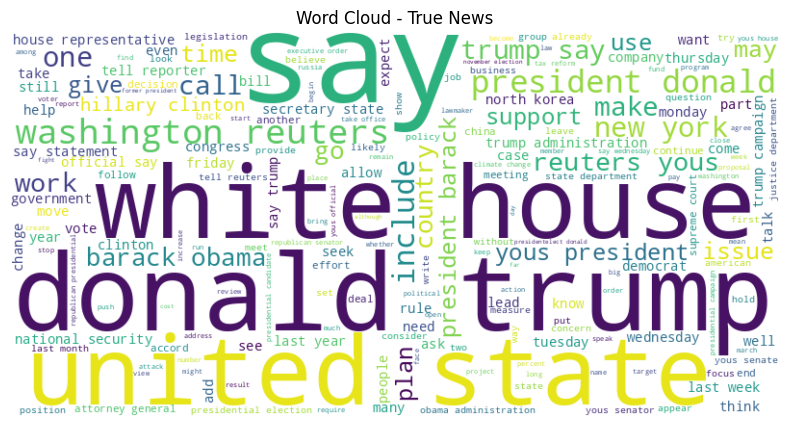

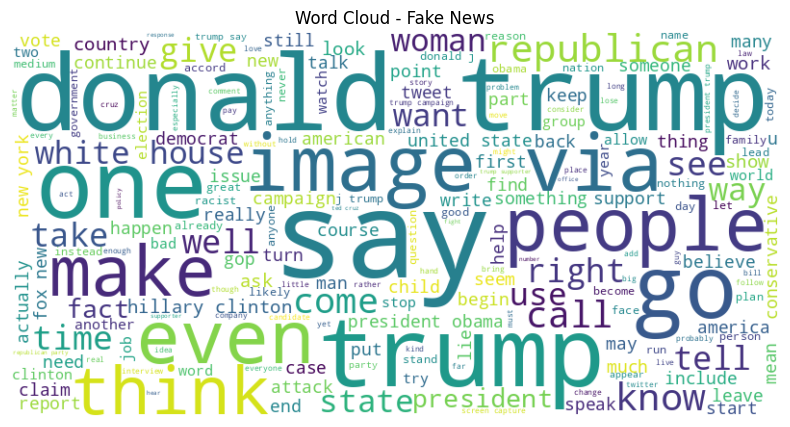

In [57]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400,
                         background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# True news word cloud
true_text = ' '.join(df[df['label'] == 'true']['cleaned_text'].dropna().astype(str))
plot_wordcloud(true_text, 'Word Cloud - True News')

# Fake news word cloud
fake_text = ' '.join(df[df['label'] == 'fake']['cleaned_text'].dropna().astype(str))
plot_wordcloud(fake_text, 'Word Cloud - Fake News')
    

# Text Length Analysis

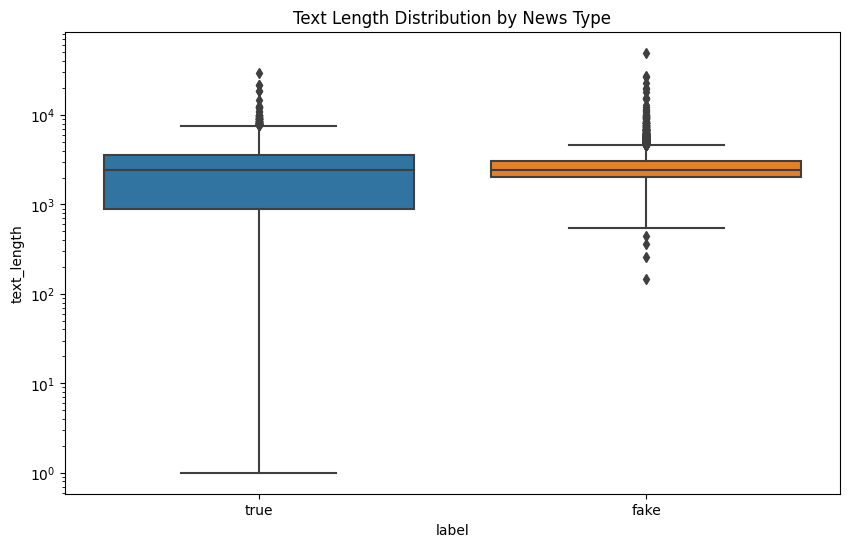

In [58]:
# add text length column
df['text_length'] = df['text'].apply(len)

# boxplot of text lengths by label
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='text_length', data=df)
plt.title('Text Length Distribution by News Type')
plt.yscale('log')  # use log scale if lengths vary greatly
plt.show()

#  N-gram Analysis

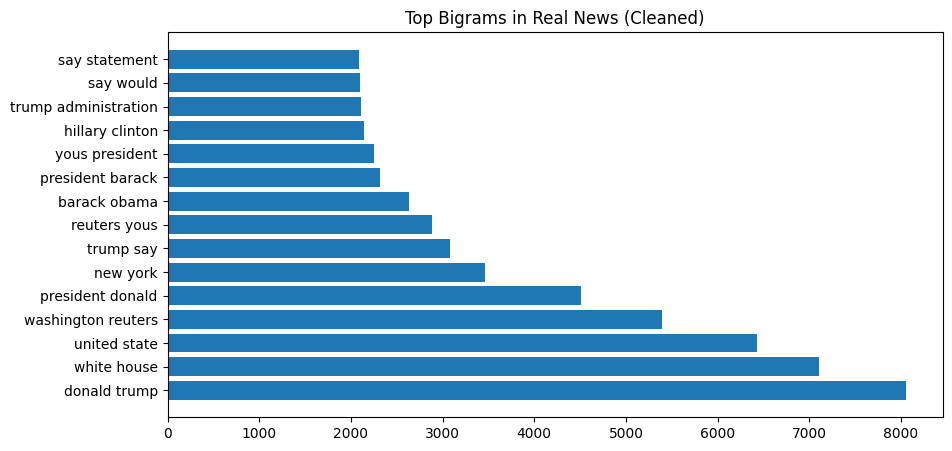

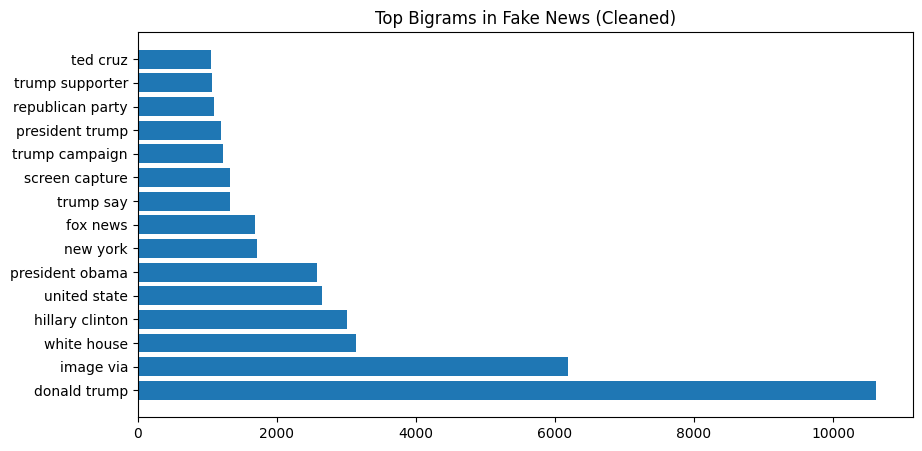

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

# function to plot n-grams
def plot_ngrams(text_series, n=2, title=""):
    # initialize the CountVectorizer with the specified n-gram range
    vec = CountVectorizer(ngram_range=(n, n)).fit(text_series)
    # transform the text series into a document-term matrix
    bag_of_words = vec.transform(text_series)
    # sum up the word counts
    sum_words = bag_of_words.sum(axis=0)
    # create a list of tuples with (n-gram, frequency) for each word in the vocabulary
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    # sort the list by frequency in descending order and keep the top 15 n-grams
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:15]

    # plot the top 15 n-grams using a horizontal bar chart
    plt.figure(figsize=(10, 5))
    plt.barh([w[0] for w in words_freq], [w[1] for w in words_freq])
    plt.title(title)
    plt.show()

# bigrams in real news
plot_ngrams(df[df['label'] == 'true']['cleaned_text'].dropna(), 2, 'Top Bigrams in Real News (Cleaned)')

# bigrams in fake news
plot_ngrams(df[df['label'] == 'fake']['cleaned_text'].dropna(), 2, 'Top Bigrams in Fake News (Cleaned)')

# Train-Test Split

In [60]:
from sklearn.model_selection import train_test_split

# drop rows where cleaned_text is NaN
df_clean = df.dropna(subset=['cleaned_text'])

# convert labels to binary
df_clean['label'] = df_clean['label'].map({'true': 0, 'fake': 1})

# Define X and y
X = df_clean['cleaned_text']
y = df_clean['label']

# 80-20 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenization and Padding

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# tokenization
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>') 
tokenizer.fit_on_texts(X_train)

# convert text to sequences of integers
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# get the vocabulary size (+1 for padding index 0)
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary size:", vocab_size)

Vocabulary size: 110214


# Visualizing Sequence Length Distribution

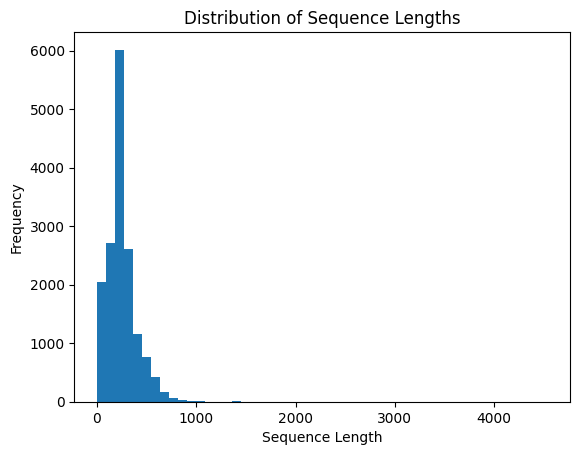

In [62]:
import matplotlib.pyplot as plt

sequence_lengths = [len(seq) for seq in X_train_seq]
plt.hist(sequence_lengths, bins=50)
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sequence Lengths')
plt.show()

The plot shows that most text sequences are short less than 500 tokens, but a few are extremely long, going over 4000 tokens.

To avoid using too much memory by padding all sequences to match the longest one, we chose a cut off at the 95th percentile. This means we kept the lengths of 95% of the sequences and ignored only the longest 5%. This approach keeps almost all the data while making training more efficient.

In [63]:
# determine optimal sequence length
seq_lengths = [len(seq) for seq in X_train_seq]
# using 95th percentile of sequence lengths as max length
max_len = int(np.percentile(seq_lengths, 95))

# padding sequences for equal length
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# check shape
print("95th Percentile max_len:", max_len)
print("Padded training shape:", X_train_pad.shape)
print("Padded test shape:", X_test_pad.shape)

95th Percentile max_len: 532
Padded training shape: (16000, 532)
Padded test shape: (4000, 532)


# Model Building and Training

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam

embedding_dim = 128

# Model 1: Simple RNN with a trainable Embedding

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import tensorflow as tf

model_rnn = Sequential([
    # embedding layer as required
    Embedding(input_dim=vocab_size, 
              output_dim=64,  
              input_length=max_len,
              mask_zero=True),

    SimpleRNN(units=32,  
              return_sequences=False,
              activation='tanh'),  
    Dropout(0.5),  
    Dense(1, activation='sigmoid')
])

optimizer = Adam(learning_rate=0.001)

model_rnn.compile(
    loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

model_rnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 532, 64)           7053696   
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                3104      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 7,056,833
Trainable params: 7,056,833
Non-trainable params: 0
_________________________________________________________________


# Model 2: LSTM with a trainable Embedding

In [90]:
from tensorflow.keras.layers import LSTM

model_lstm = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_shape=(max_len,)),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_lstm.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model_lstm.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 532, 300)          33064200  
                                                                 
 lstm_6 (LSTM)               (None, 64)                93440     
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 33,157,705
Trainable params: 33,157,705
Non-trainable params: 0
_________________________________________________________________


# Model 3: LSTM with Pretrained Word2Vec Embedding

In [71]:
import numpy as np
import gensim.downloader as api
from tensorflow.keras.initializers import Constant
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# load pre-trained Word2Vec embeddings
try:
    w2v = api.load('word2vec-google-news-300')
    print("Successfully loaded Word2Vec embeddings")
except Exception as e:
    print(f"Error loading embeddings: {e}")

In [72]:
# create embedding matrix
embedding_dim = 300
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    if i < vocab_size and word in w2v:
        embedding_matrix[i] = w2v[word]

In [86]:
model_lstm_w2v = Sequential([
    Embedding(input_dim=vocab_size,
              output_dim=embedding_dim,
              input_shape=(max_len,),
              embeddings_initializer=Constant(embedding_matrix)),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# freeze embedding layer
model_lstm_w2v.layers[0].trainable = False

model_lstm_w2v.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# compile the model
model_lstm_w2v.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 532, 300)          33064200  
                                                                 
 lstm_5 (LSTM)               (None, 64)                93440     
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 33,157,705
Trainable params: 93,505
Non-trainable params: 33,064,200
_________________________________________________________________


# **Model Training and Evaluation**

# **Training with Early Stopping**

# **RNN Model Train**

In [93]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# define training parameters
epochs = 10
batch_size = 64

callbacks_rnn = [
    EarlyStopping(monitor='val_loss',  # Monitor loss for more stable behavior
                  patience=3,
                  restore_best_weights=True),
    
    ModelCheckpoint('best_model_rnn.h5',
                   monitor='val_loss',
                   save_best_only=True),
    
    ReduceLROnPlateau(monitor='val_loss',
                      factor=0.5,
                      patience=2,
                      min_lr=1e-6,
                      verbose=1)
]

history_rnn = model_rnn.fit(
    X_train_pad, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=64,
    callbacks=callbacks_rnn,
    verbose=1
)

Epoch 1/20
200/200 [==============================] - 40s 192ms/step - loss: 0.2034 - accuracy: 0.9230 - val_loss: 0.0355 - val_accuracy: 0.9916 - lr: 0.0010
Epoch 2/20
200/200 [==============================] - 38s 188ms/step - loss: 0.0846 - accuracy: 0.9784 - val_loss: 0.0580 - val_accuracy: 0.9875 - lr: 0.0010
Epoch 3/20
200/200 [==============================] - ETA: 0s - loss: 0.0435 - accuracy: 0.9903
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
200/200 [==============================] - 38s 188ms/step - loss: 0.0435 - accuracy: 0.9903 - val_loss: 0.0425 - val_accuracy: 0.9875 - lr: 0.0010
Epoch 4/20
200/200 [==============================] - 38s 190ms/step - loss: 0.0208 - accuracy: 0.9959 - val_loss: 0.0265 - val_accuracy: 0.9944 - lr: 5.0000e-04
Epoch 5/20
200/200 [==============================] - 38s 190ms/step - loss: 0.0101 - accuracy: 0.9983 - val_loss: 0.0270 - val_accuracy: 0.9937 - lr: 5.0000e-04
Epoch 6/20
200/200 [=====================

# LSTM Model Train

In [91]:
epochs=10
batch_size=64

callbacks_lstm = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint('best_model_lstm.h5', save_best_only=True)
]

# train the model
history_lstm = model_lstm.fit(
    X_train_pad, y_train,
    validation_split=0.2,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=callbacks_lstm
)

Epoch 1/10
200/200 [==============================] - 198s 977ms/step - loss: 0.6789 - accuracy: 0.5341 - val_loss: 0.6670 - val_accuracy: 0.5391
Epoch 2/10
200/200 [==============================] - 188s 941ms/step - loss: 0.7073 - accuracy: 0.5384 - val_loss: 0.6695 - val_accuracy: 0.5350
Epoch 3/10
200/200 [==============================] - 187s 933ms/step - loss: 0.6637 - accuracy: 0.5502 - val_loss: 0.6637 - val_accuracy: 0.5359
Epoch 4/10
200/200 [==============================] - 182s 909ms/step - loss: 0.6599 - accuracy: 0.5414 - val_loss: 0.6607 - val_accuracy: 0.5469
Epoch 5/10
200/200 [==============================] - 184s 919ms/step - loss: 0.6815 - accuracy: 0.5601 - val_loss: 0.6245 - val_accuracy: 0.6106
Epoch 6/10
200/200 [==============================] - 185s 923ms/step - loss: 0.2319 - accuracy: 0.9201 - val_loss: 0.1501 - val_accuracy: 0.9597
Epoch 7/10
200/200 [==============================] - 185s 923ms/step - loss: 0.1483 - accuracy: 0.9617 - val_loss: 0.1425 -

# LSTM W2V Model Train

In [87]:
epochs=10
batch_size=64

callbacks_lstm_w2v = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint('best_model_lstm_w2v.h5', save_best_only=True)
]


# Train the model
history_lstm_w2v = model_lstm_w2v.fit(
    X_train_pad, y_train,
    validation_split=0.2,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=callbacks_lstm_w2v
)

Epoch 1/10
200/200 [==============================] - 77s 372ms/step - loss: 0.6704 - accuracy: 0.5470 - val_loss: 0.6655 - val_accuracy: 0.5459
Epoch 2/10
200/200 [==============================] - 78s 389ms/step - loss: 0.6650 - accuracy: 0.5550 - val_loss: 0.6603 - val_accuracy: 0.5591
Epoch 3/10
200/200 [==============================] - 67s 334ms/step - loss: 0.6561 - accuracy: 0.5701 - val_loss: 0.6644 - val_accuracy: 0.5481
Epoch 4/10
200/200 [==============================] - 78s 390ms/step - loss: 0.4055 - accuracy: 0.7941 - val_loss: 0.2332 - val_accuracy: 0.9378
Epoch 5/10
200/200 [==============================] - 78s 392ms/step - loss: 0.1915 - accuracy: 0.9484 - val_loss: 0.1791 - val_accuracy: 0.9500
Epoch 6/10
200/200 [==============================] - 69s 345ms/step - loss: 0.1901 - accuracy: 0.9509 - val_loss: 0.1913 - val_accuracy: 0.9438
Epoch 7/10
200/200 [==============================] - 67s 334ms/step - loss: 0.1774 - accuracy: 0.9525 - val_loss: 0.1955 - val_ac

# Model Evaluation and Visualization

In [78]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

def evaluate_model(model, history, X_test, y_test):
    # plot training history
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # evaluate on test set
    y_pred = (model.predict(X_test) > 0.5).astype(int)

    # Classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# **Evaluating RNN Model**

Evaluating Simple RNN Model:


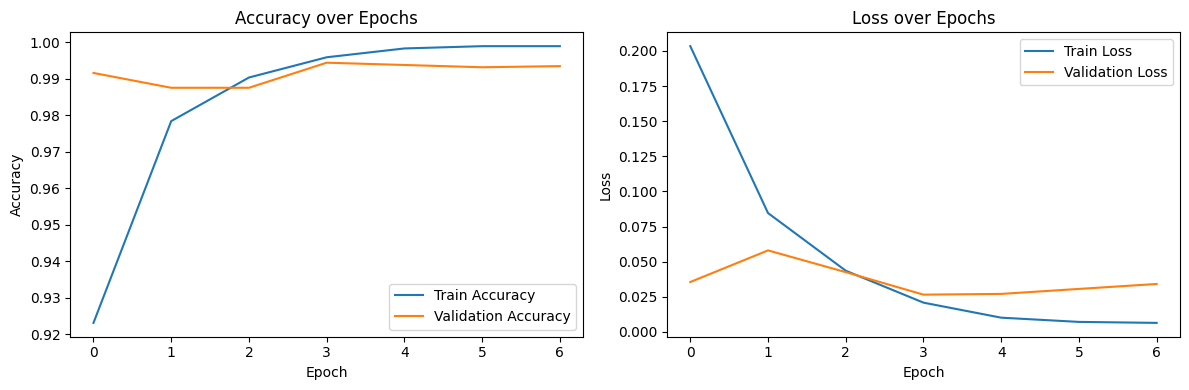

125/125 [==============================] - 5s 37ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1945
           1       1.00      0.99      0.99      2055

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000



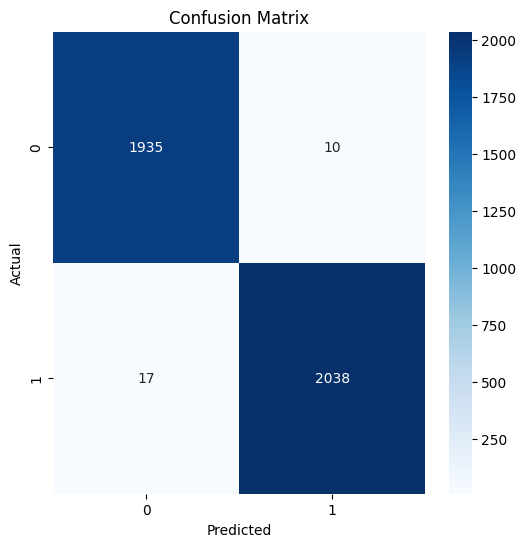

In [94]:
print("Evaluating Simple RNN Model:")
evaluate_model(model_rnn, history_rnn, X_test_pad, y_test)

# **Evaluating LSTM Model**


Evaluating LSTM Model:


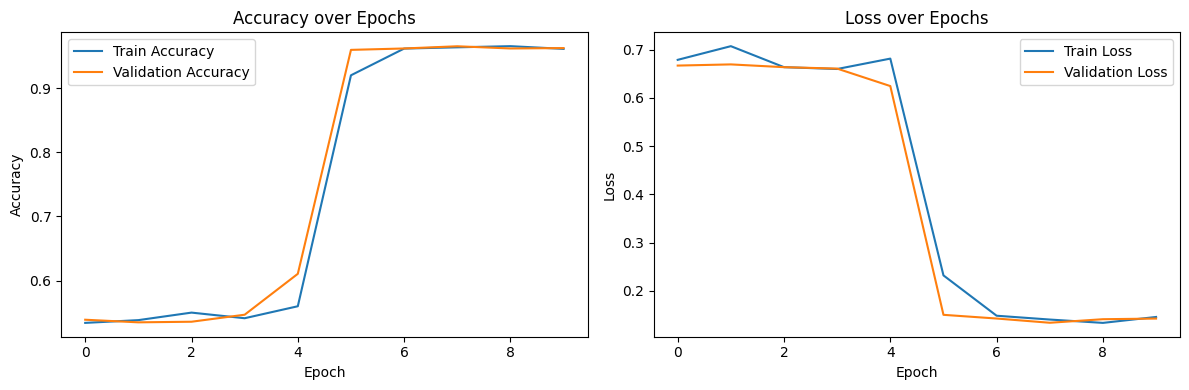

125/125 [==============================] - 12s 92ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1945
           1       1.00      0.93      0.96      2055

    accuracy                           0.96      4000
   macro avg       0.96      0.96      0.96      4000
weighted avg       0.96      0.96      0.96      4000



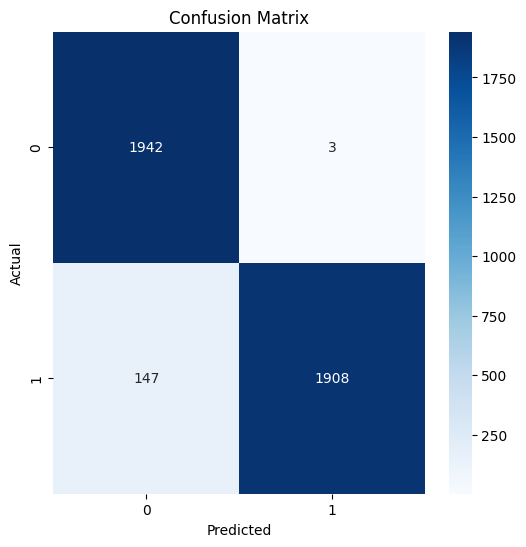

In [92]:
print("\nEvaluating LSTM Model:")
evaluate_model(model_lstm, history_lstm, X_test_pad, y_test)

# Evaluating LSTM with Word2Vec Model


Evaluating LSTM with Word2Vec Model:


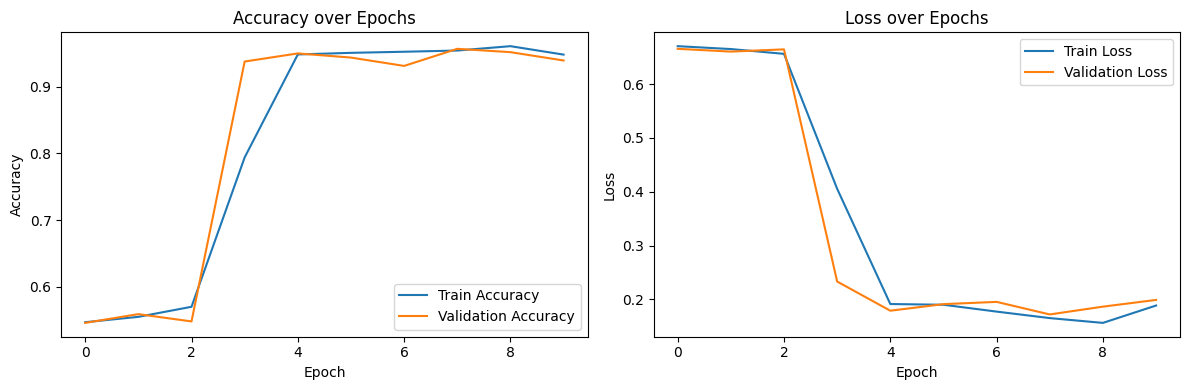

125/125 [==============================] - 12s 91ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.94      1945
           1       1.00      0.89      0.94      2055

    accuracy                           0.94      4000
   macro avg       0.95      0.94      0.94      4000
weighted avg       0.95      0.94      0.94      4000



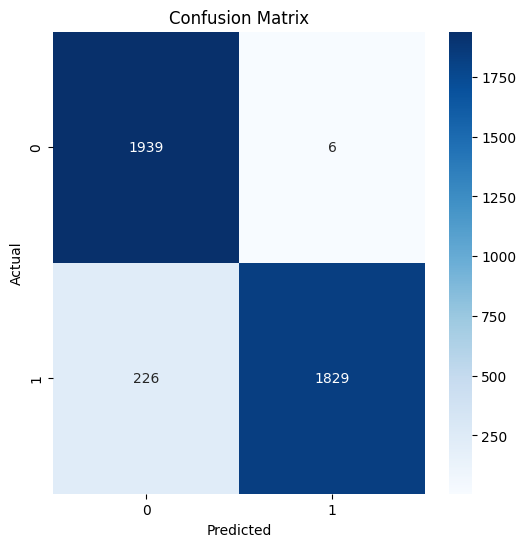

In [88]:

print("\nEvaluating LSTM with Word2Vec Model:")
evaluate_model(model_lstm_w2v, history_lstm_w2v, X_test_pad, y_test)

# **Predictions on Test Set**

In [95]:
# predict probabilities
y_pred_prob = model_rnn.predict(X_test_pad)

# convert probabilities to binary predictions (0 or 1)
y_pred = (y_pred_prob > 0.5).astype(int)

125/125 [==============================] - 5s 38ms/step


In [96]:
print("Classification Report on Test Set for RNN Model:")
print(classification_report(y_test, y_pred))

Classification Report on Test Set for RNN Model:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1945
           1       1.00      0.99      0.99      2055

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000



In [97]:
# predict probabilities
y_pred_prob = model_lstm.predict(X_test_pad)

# convert probabilities to binary predictions (0 or 1)
y_pred = (y_pred_prob > 0.5).astype(int)

125/125 [==============================] - 11s 90ms/step


In [98]:
print("Classification Report on Test Set for LSTM Model:")
print(classification_report(y_test, y_pred))

Classification Report on Test Set for LSTM Model:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1945
           1       1.00      0.93      0.96      2055

    accuracy                           0.96      4000
   macro avg       0.96      0.96      0.96      4000
weighted avg       0.96      0.96      0.96      4000



In [99]:
# predict probabilities
y_pred_prob = model_lstm_w2v.predict(X_test_pad)

# convert probabilities to binary predictions (0 or 1)
y_pred = (y_pred_prob > 0.5).astype(int)

125/125 [==============================] - 12s 93ms/step


In [100]:
print("Classification Report on Test Set for LSTM and Word2Vec Model:")
print(classification_report(y_test, y_pred))

Classification Report on Test Set for LSTM and Word2Vec Model:
              precision    recall  f1-score   support

           0       0.90      1.00      0.94      1945
           1       1.00      0.89      0.94      2055

    accuracy                           0.94      4000
   macro avg       0.95      0.94      0.94      4000
weighted avg       0.95      0.94      0.94      4000



# **GUI for Real-Time Prediction** 

# Using Gradio for Interface

In [101]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 32.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 105.3 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.4 MB/s eta 0:00:00


In [102]:
# Print first 5 items from test split
print("First 5 test samples:")
for i in range(5):
    print(f"Text: {X_test.iloc[i]}")
    print(f"Label: {'Fake' if y_test.iloc[i] == 1 else 'True'}")
    print("-" * 50)

First 5 test samples:
Text: first say wage high say work raise minimum wage donald trump seem imply want abolish federal minimum wage altogether appear meet press trump advocate allow state set standard federal government like idea let state decide think people get think work low number ask federal government show play part establish floor start regard minimum wage trump say rather state go state compete country compete go record say know live 725 hour would say let state decide admits people suffer poverty wage want allow republicanled state like wisconsin kansa decide fatesand typical trump fashion admit plan place people struggle make end meet say decide term number think people get like everything else think anything rely talk point get attention voteswhile run analysis core supporter atlantic find fullyear employment rate men without bachelor degree fell 76 percent 1990 68 percent 2013 real wage grow men woman fouryear degree good last 25 year fall meaningfully noncollege men uned

In [ ]:
import gradio as gr
import numpy as np

def predict_news(text):
    try:
        # clean text
        cleaned_text = text_cleaning_pipeline(text)

        # tokenize and pad
        sequence = tokenizer.texts_to_sequences([cleaned_text])
        padded = pad_sequences(sequence, maxlen=max_len, padding='post')

        # get predictions
        pred_rnn = model_rnn.predict(padded)[0][0]
        pred_lstm = model_lstm.predict(padded)[0][0]
        pred_w2v = model_lstm_w2v.predict(padded)[0][0]

        # format outputs (0=true, 1=fake)
        rnn_result = f"True ({pred_rnn:.2f})" if pred_rnn < 0.5 else f"Fake ({pred_rnn:.2f})"
        lstm_result = f"True ({pred_lstm:.2f})" if pred_lstm < 0.5 else f"Fake ({pred_lstm:.2f})"
        w2v_result = f"True ({pred_w2v:.2f})" if pred_w2v < 0.5 else f"Fake ({pred_w2v:.2f})"

        return rnn_result, lstm_result, w2v_result

    except Exception as e:
        print(f"Error: {e}")
        return "Error", "Error", "Error"

# create interface
# Create interface with improved design
iface = gr.Interface(
    fn=predict_news,
    inputs=gr.Textbox(
        lines=10, 
        label="News Article Text",
        placeholder="Paste the news article content here...",
        elem_classes=["input-box"]
    ),
    outputs=[
        gr.Textbox(label="RNN Model Prediction", 
                 elem_classes=["rnn-output"]),
        gr.Textbox(label="LSTM Model Prediction",
                 elem_classes=["lstm-output"]),
        gr.Textbox(label="LSTM + Word2Vec Prediction", 
                 elem_classes=["w2v-output"]),
    ],
    title="Fake News Detection System",
    description="This tool analyzes news articles using three different AI models to assess their authenticity. Results show prediction confidence scores.",
    theme="soft",
    examples=[
        ["first say wage high say work raise minimum wage donald trump seem imply want abolish federal minimum wage altogether appear meet press trump advocate allow state set standard federal government like idea let state decide think people get think work low number ask federal government show play part establish floor start regard minimum wage trump say rather state go state compete country compete go record say know live 725 hour would say let state decide admits people suffer poverty wage want allow republicanled state like wisconsin kansa decide fatesand typical trump fashion admit plan place people struggle make end meet say decide term number think people get like everything else think anything rely talk point get attention voteswhile run analysis core supporter atlantic find fullyear employment rate men without bachelor degree fell 76 percent 1990 68 percent 2013 real wage grow men woman fouryear degree good last 25 year fall meaningfully noncollege men uneducated men serious chunk trump supporter also mostly live red state see wage decrease yet messiah want raise minimum wage take copout argument state right oppose itno wonder trump love poorly educatedwith trump never know get one day want raise day next day againfeatured image via spencer plattgetty image"],
        ["Celebrity claims to have discovered fountain of youth in backyard"]
    ],
    css="""
    .input-box textarea {
        font-size: 16px;
        padding: 15px;
        border-radius: 8px;
        border: 1px solid #e0e0e0;
    }
    .rnn-output, .lstm-output, .w2v-output {
        font-size: 18px;
        padding: 15px;
        border-radius: 8px;
        margin-top: 10px;
        font-weight: 500;
    }
    .rnn-output {
        background-color: #e3f2fd;
        border-left: 5px solid #2196f3;
    }
    .lstm-output {
        background-color: #e8f5e9;
        border-left: 5px solid #4caf50;
    }
    .w2v-output {
        background-color: #fff3e0;
        border-left: 5px solid #ff9800;
    }
    h1 {
        color: #2c3e50;
        text-align: center;
    }   
    .description {
        font-size: 16px;
        color: #7f8c8d;
        text-align: center;
        margin-bottom: 20px;
    }
    """
)

iface.launch()

* Running on local URL:  http://127.0.0.1:7860
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

* Running on public URL: https://35d2662c58bb2e1f46.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 39ms/step
